In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans, FeatureAgglomeration, MiniBatchKMeans
from scipy.stats import skew, kurtosis, norm
from sklearn.metrics import silhouette_score

sns.set_style(style = 'darkgrid')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("mcdonalds.csv") # Loading data
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [3]:
df.shape # shape of the data

(1453, 15)

In [4]:
df.info() # info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [6]:
df.describe(include = 'O') # Summary of categorical variable

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,439,788


In [7]:
df[df.duplicated() == True].shape # 22 rows are duplicated

(22, 15)

In [8]:
df = df.drop_duplicates().reset_index(drop = True)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1427,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1428,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1429,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


## Variable Analysis

In [9]:
df['Like'] = df['Like'].replace('I hate it!-5',-5)
df['Like'] = df['Like'].replace('I love it!+5',+5)

for q in df['Like'].unique().tolist():
    df['Like'] = df['Like'].replace(q,int(q))

In [10]:
df['VisitFrequency'] = df['VisitFrequency'].replace('Never',0) # Least Frequency
df['VisitFrequency'] = df['VisitFrequency'].replace('Once a week',1)
df['VisitFrequency'] = df['VisitFrequency'].replace('More than once a week',2) # Most Frequency
df['VisitFrequency'] = df['VisitFrequency'].replace('Once a month',3)
df['VisitFrequency'] = df['VisitFrequency'].replace('Every three months',4)
df['VisitFrequency'] = df['VisitFrequency'].replace('Once a year',5) # Least Frequency

In [11]:
obj = df.dtypes[df.dtypes == 'object'].index.tolist()

#### Variation of Age with Visiting Frequency and Like for different hue:

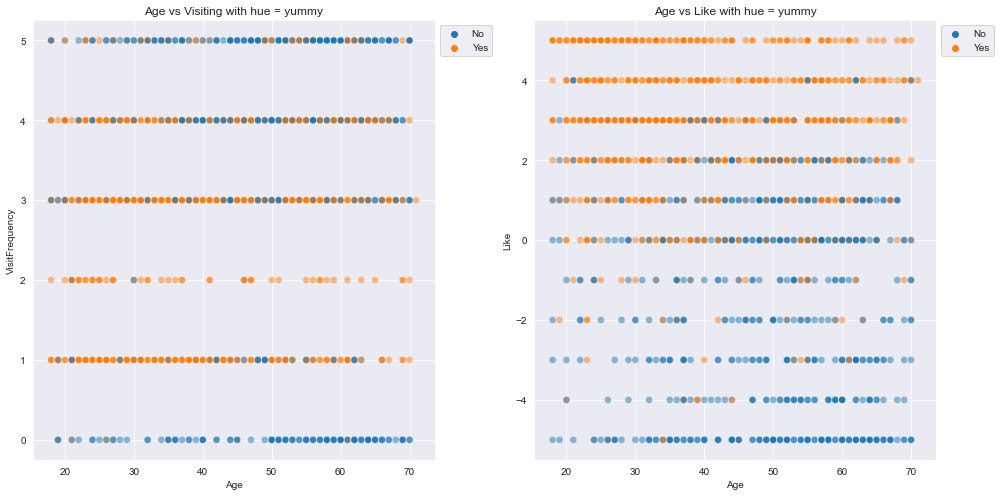

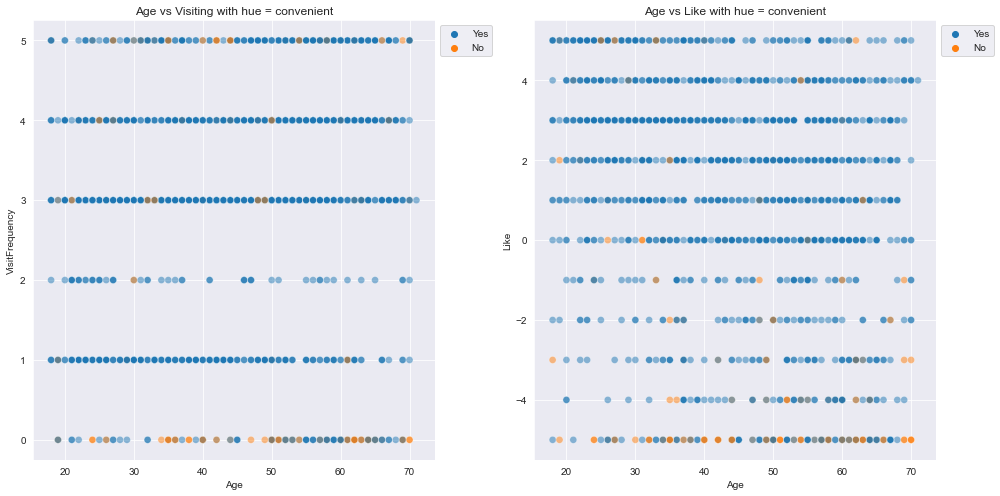

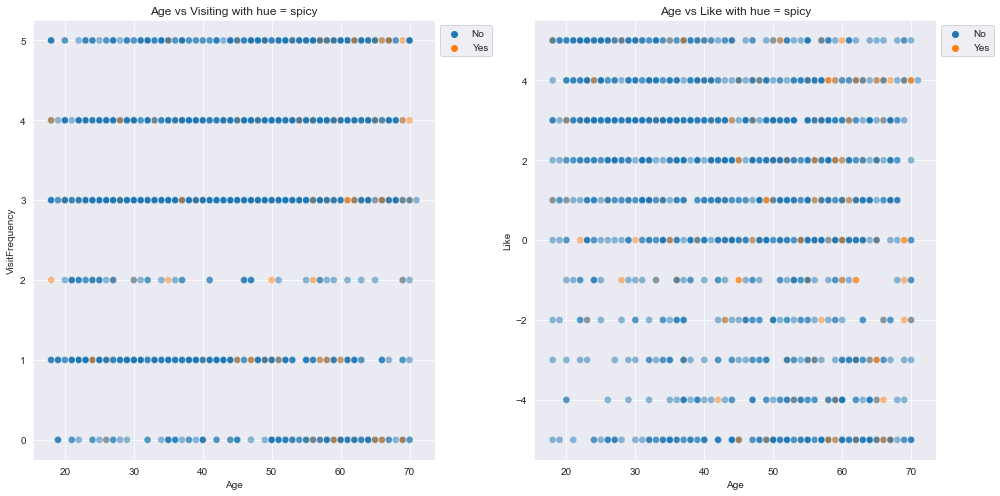

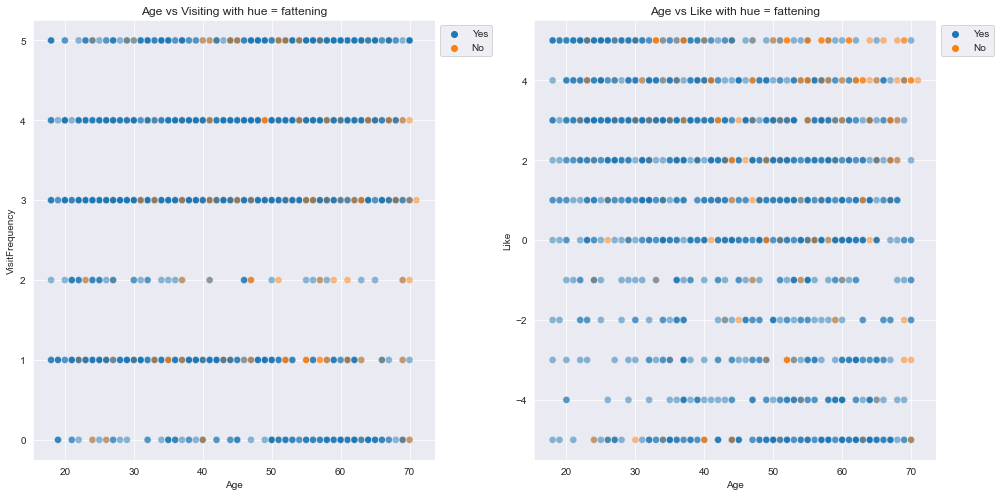

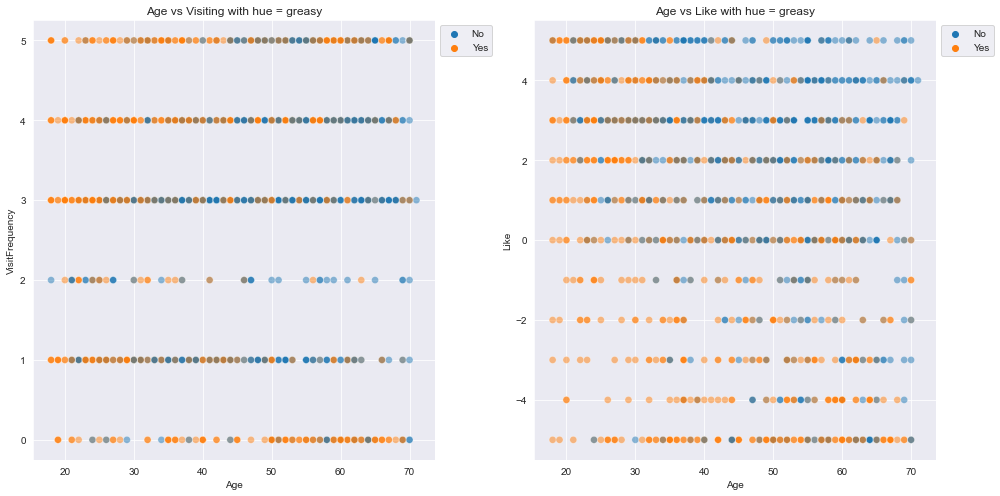

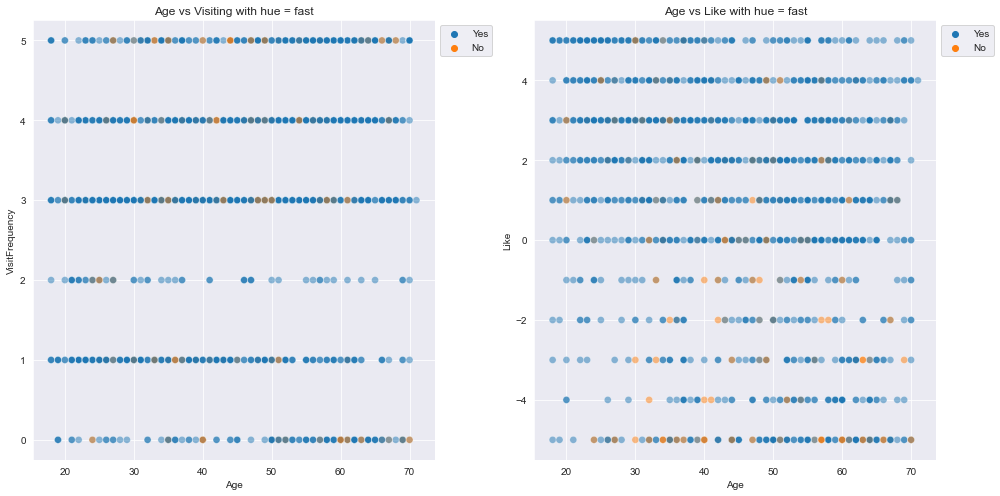

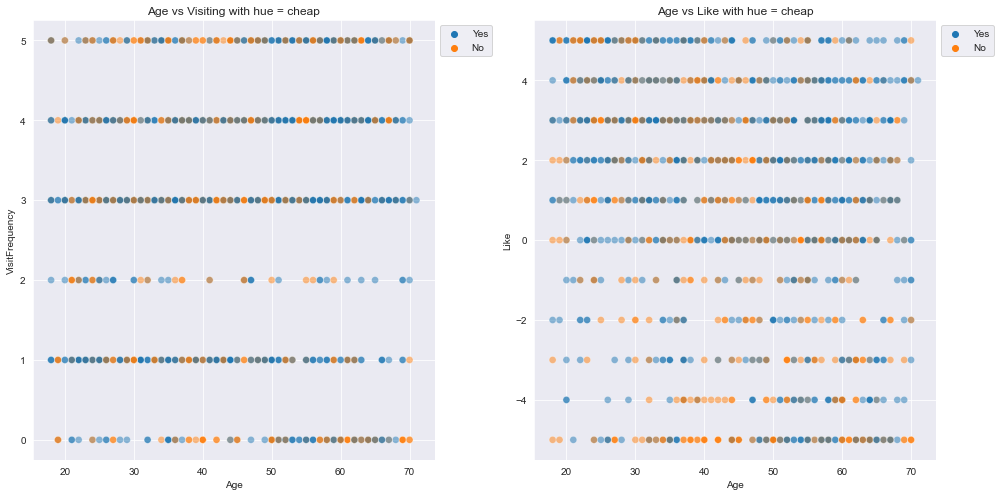

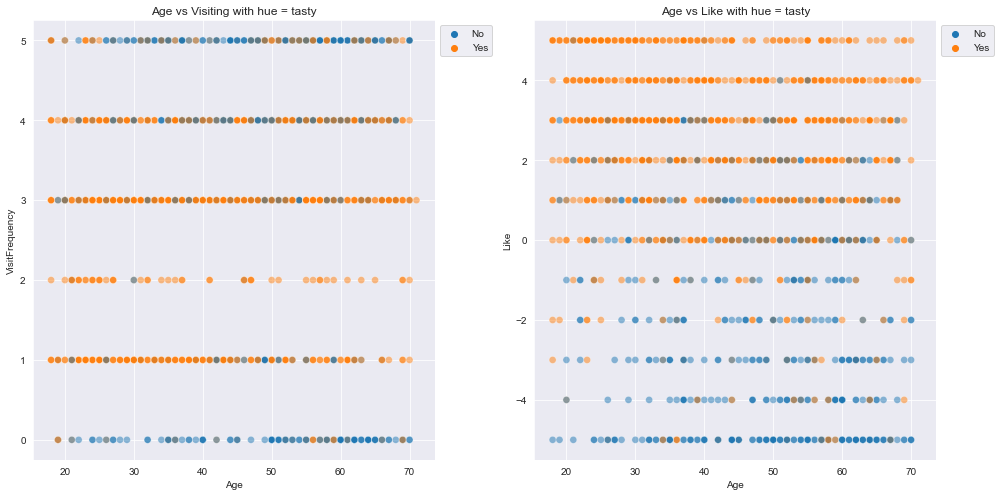

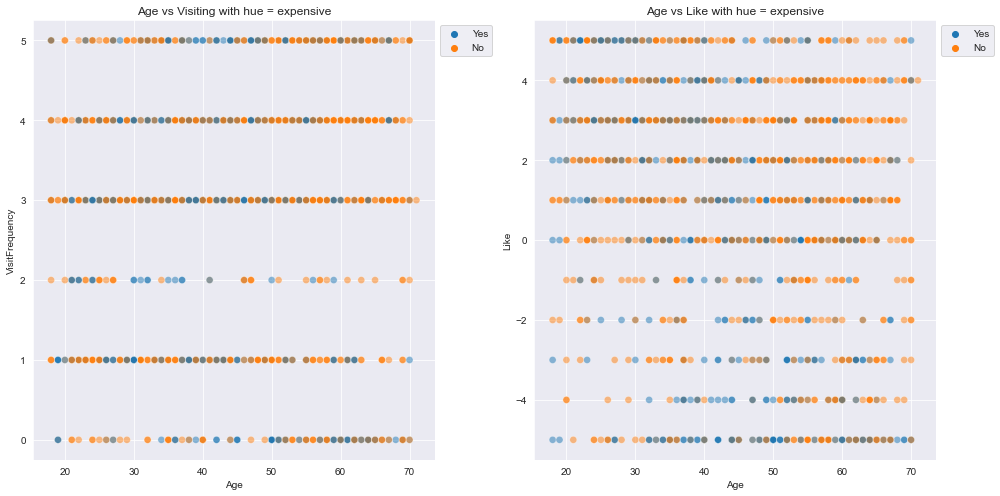

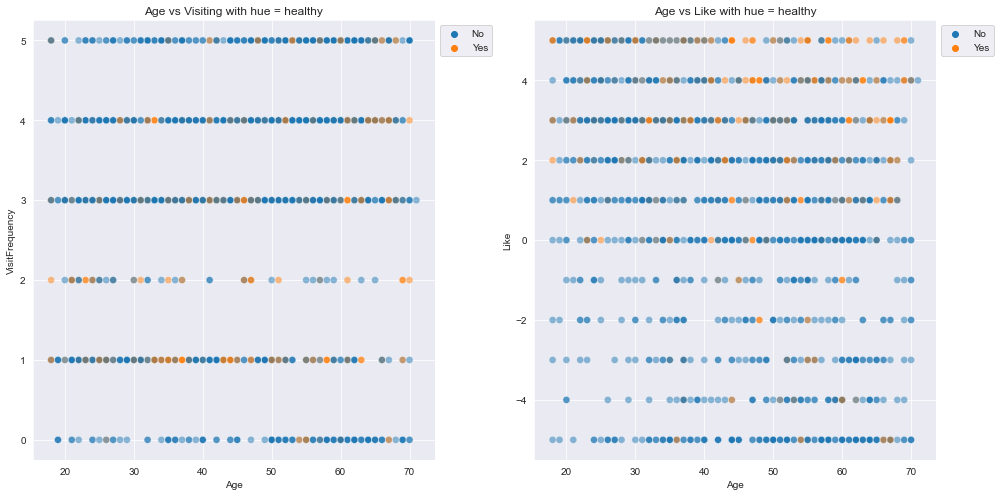

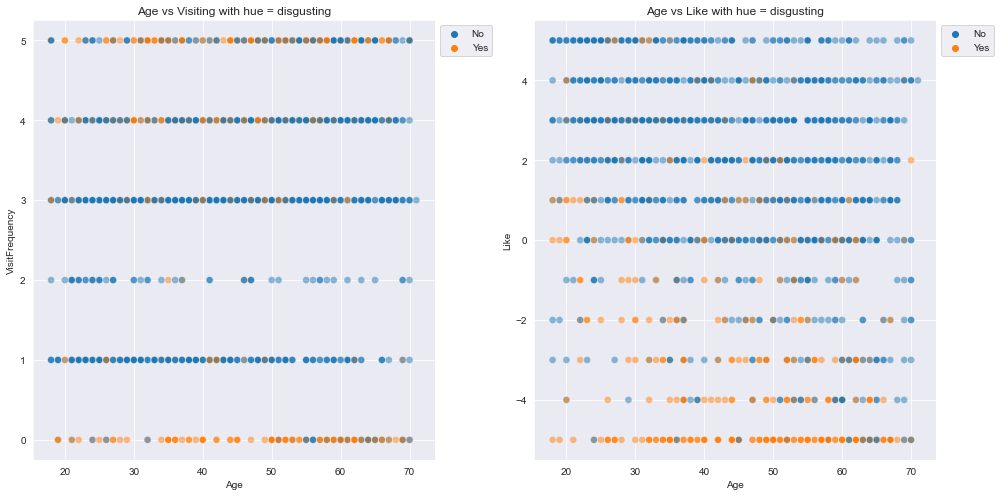

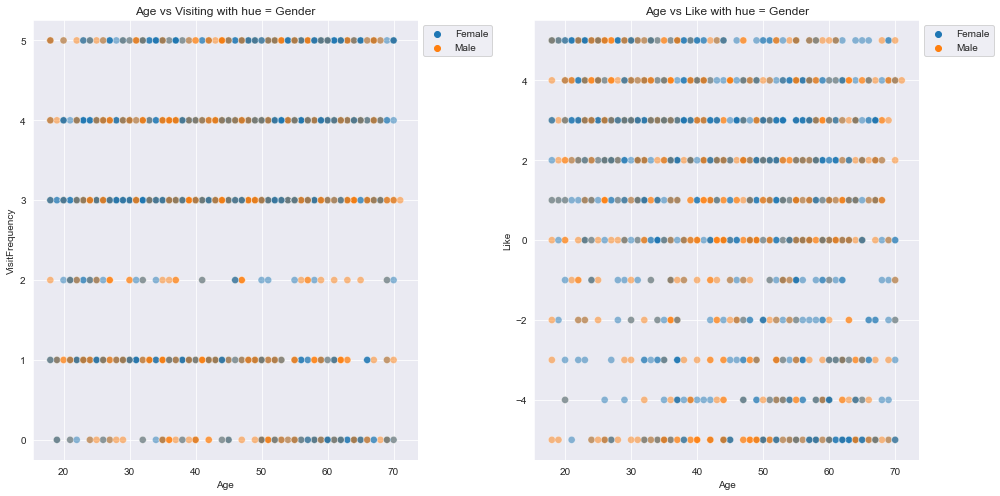

In [12]:
for w in obj:
    
    plt.figure(figsize = (14,7))
    
    plt.subplot(121)
    sns.scatterplot('Age','VisitFrequency', hue = w, data = df, s = 50, alpha = 0.5)
    plt.title(f'Age vs Visiting with hue = {w}')
    plt.legend(bbox_to_anchor = (1,1))
    plt.tight_layout()
    
    plt.subplot(122)
    sns.scatterplot('Age','Like', hue = w, data = df, s = 50, alpha = 0.5)
    plt.title(f'Age vs Like with hue = {w}')
    plt.legend(bbox_to_anchor = (1,1))
    plt.tight_layout()
    
    plt.show()

##### No specific patterns observed from above graphs.

#### Distribution of age variable:

Skewness of age: -0.09.
Kurtosis of age: -1.149.


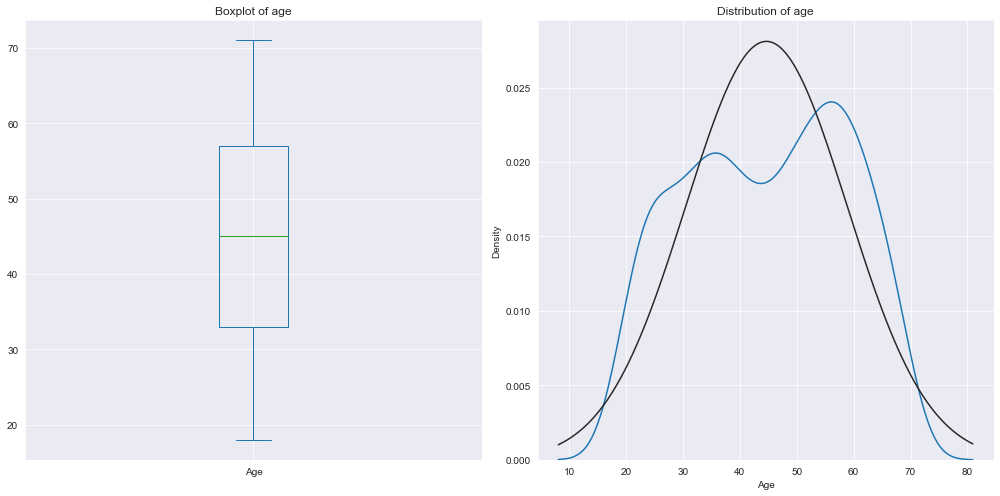

In [13]:
plt.figure(figsize = (14,7))

plt.subplot(121)
df['Age'].plot(kind = 'box')
plt.title(f'Boxplot of age')
plt.tight_layout()

plt.subplot(122)
sns.distplot(df['Age'], fit = norm, hist = False)
plt.title('Distribution of age')
plt.tight_layout()

print(f'Skewness of age: {np.round(skew(df.Age),3)}.')
print(f'Kurtosis of age: {np.round(kurtosis(df.Age),3)}.')

##### No outliers observed. Age variable has -ve skewness, indicating it's mean value is less than the median value. Also, the distribution of age variable is platykurtic.

#### Distribution of categorical variables can be infered from below:

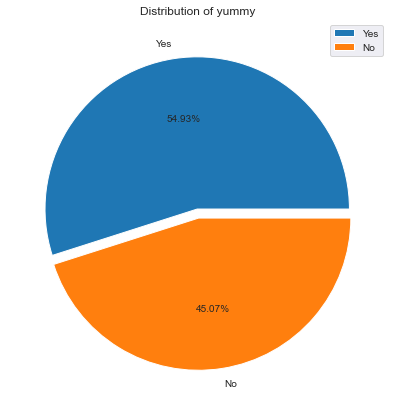

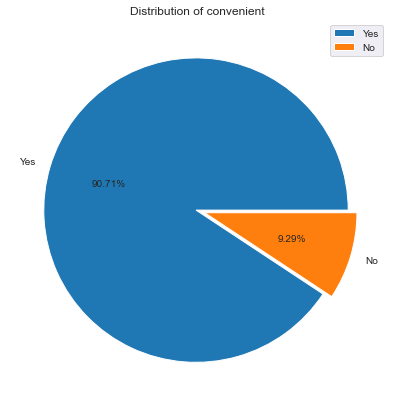

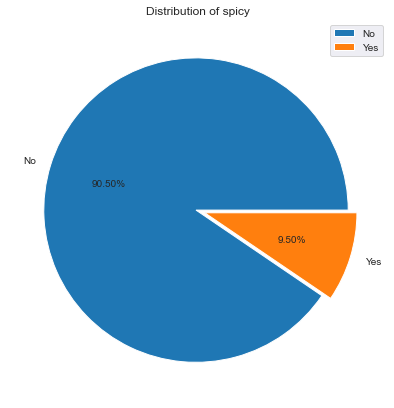

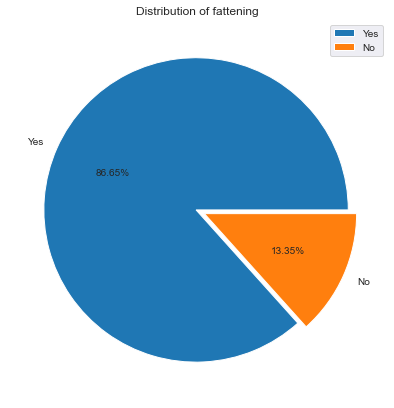

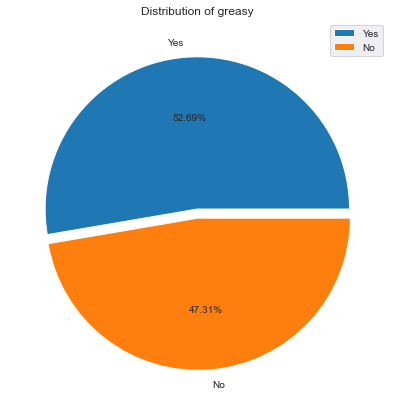

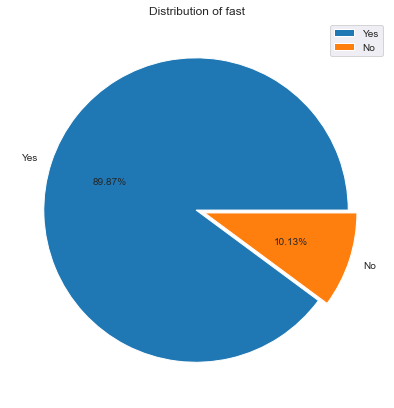

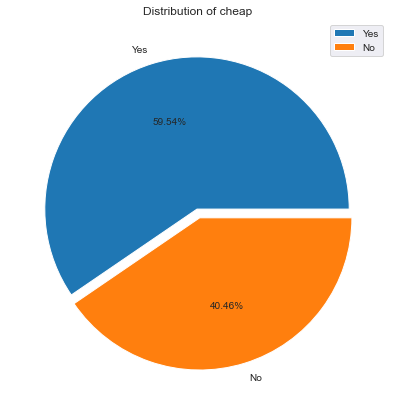

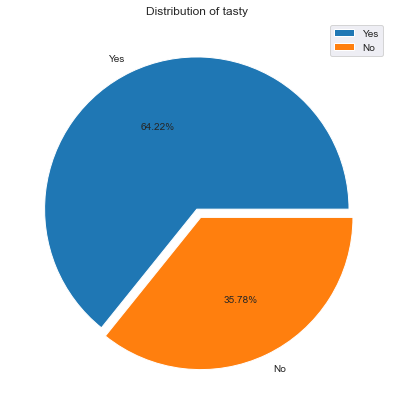

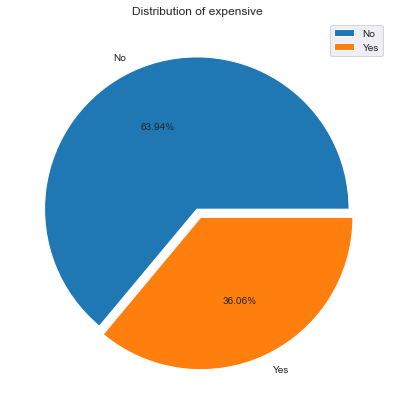

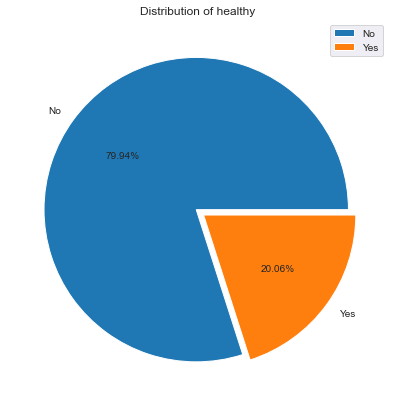

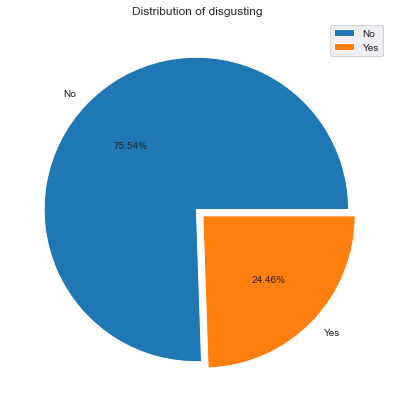

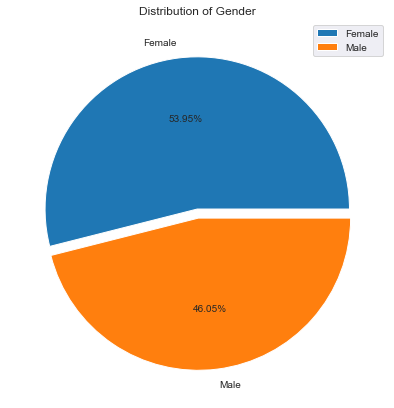

In [14]:
for r in obj:
    plt.figure(figsize = (14,7))
    plt.pie(df[r].value_counts(), labels = df[r].value_counts().index.tolist(),
            explode = (0.01,0.05), autopct = '%.2f%%')
    plt.title(f'Distribution of {r}')
    plt.legend()
    plt.show()

#### Heatmap

<AxesSubplot:>

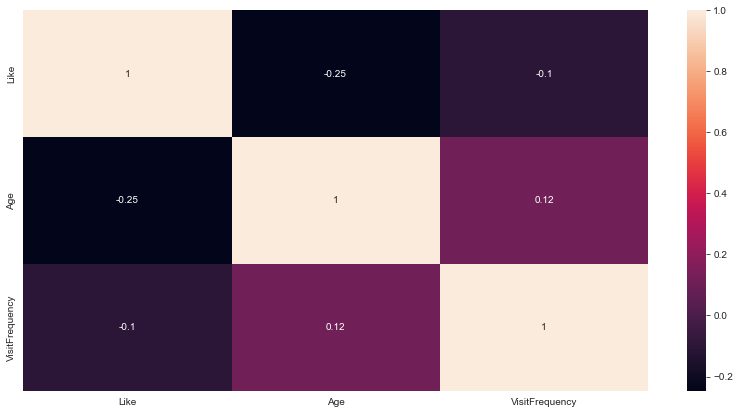

In [15]:
plt.figure(figsize = (14,7))
sns.heatmap(df.corr(), annot = True)

##### No strong correlation present between the continuous variables.

## Encoding

In [16]:
u = 0

for r in obj:
    l = [i for i in range(len(sorted(df[r].unique())))]
    print(f'In {r}, we replace: {sorted(df[r].unique())} by {l}.')

In yummy, we replace: ['No', 'Yes'] by [0, 1].
In convenient, we replace: ['No', 'Yes'] by [0, 1].
In spicy, we replace: ['No', 'Yes'] by [0, 1].
In fattening, we replace: ['No', 'Yes'] by [0, 1].
In greasy, we replace: ['No', 'Yes'] by [0, 1].
In fast, we replace: ['No', 'Yes'] by [0, 1].
In cheap, we replace: ['No', 'Yes'] by [0, 1].
In tasty, we replace: ['No', 'Yes'] by [0, 1].
In expensive, we replace: ['No', 'Yes'] by [0, 1].
In healthy, we replace: ['No', 'Yes'] by [0, 1].
In disgusting, we replace: ['No', 'Yes'] by [0, 1].
In Gender, we replace: ['Female', 'Male'] by [0, 1].


In [17]:
for e in obj:
    df[e] = df[e].astype('category').cat.codes
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,4,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,4,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,4,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,1,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,0,1,0,1,1,0,0,0,1,0,1,-5,47,5,1
1427,1,1,0,1,0,0,1,1,0,1,0,2,36,1,0
1428,1,1,0,1,0,1,0,1,1,0,0,3,52,3,0
1429,1,1,0,0,0,1,1,1,0,1,0,4,41,4,1


## Clustering

In [18]:
df_cluster = df.iloc[:,:].values
df_cluster

array([[ 0,  1,  0, ..., 61,  4,  0],
       [ 1,  1,  0, ..., 51,  4,  0],
       [ 0,  1,  1, ..., 62,  4,  0],
       ...,
       [ 1,  1,  0, ..., 52,  3,  0],
       [ 1,  1,  0, ..., 41,  4,  1],
       [ 0,  1,  0, ..., 30,  4,  1]], dtype=int64)

### 1) Using K-Means Clustering

In [19]:
wcss = []

for o in range(1,11):
    km = KMeans(n_clusters = o)
    km.fit(df_cluster)
    wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

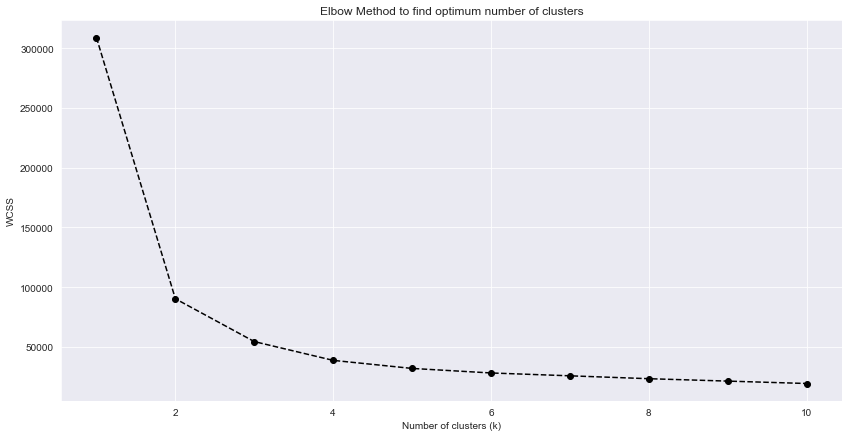

In [20]:
plt.figure(figsize = (14,7))
plt.plot([i for i in range(1,11)], wcss,'k--o')
plt.title('Elbow Method to find optimum number of clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')

##### Sudden change in WCSS at k = 3. So we select number of clusters = 3.

In [21]:
model_km = KMeans(n_clusters=3)
y_predict = model_km.fit_predict(df_cluster)
print(f'Clustering score of model: {np.round(silhouette_score(df_cluster,model_km.labels_)*100, 2)}%.')

col = df.iloc[:,:].columns

Clustering score of model: 46.16%.


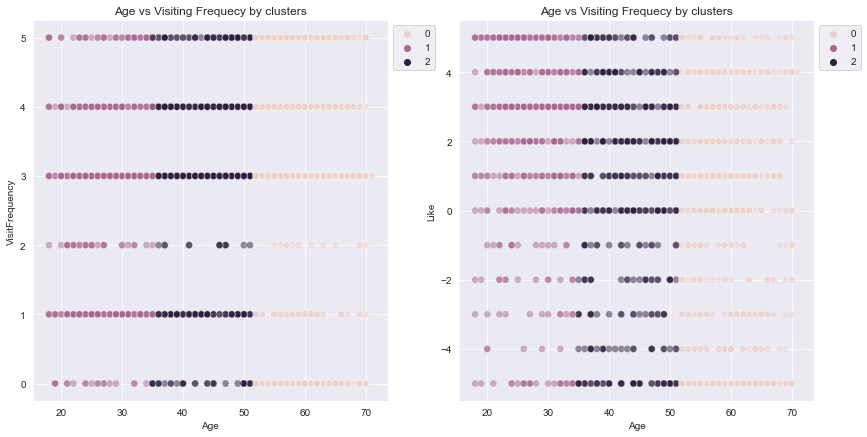

In [22]:
plt.figure(figsize = (14,7))
    
plt.subplot(121)
sns.scatterplot( x = 'Age', y = 'VisitFrequency' , data = df, s = 50, hue = y_predict, alpha = 0.5)
plt.xlabel("Age")
plt.ylabel("VisitFrequency")
plt.title('Age vs Visiting Frequecy by clusters')
plt.legend(bbox_to_anchor = (1,1))

plt.subplot(122)
sns.scatterplot( x = 'Age', y = 'Like' , data = df, s = 50, hue = y_predict, alpha = 0.5)
plt.xlabel("Age")
plt.ylabel("Like")
plt.title('Age vs Visiting Frequecy by clusters')
plt.legend(bbox_to_anchor = (1,1))
plt.show()

##### From above graph, it is clear that the clusters formed are directly related to the age-category one belongs to. Cluster 0 is from above 50 till 70, while custer 1 starts from around 35 til 50 and cluster 0 is from 20 to 35 years.

### 2) Agglomerative Clustering

In [23]:
model_agg = AgglomerativeClustering(n_clusters=3, linkage='average').fit(df_cluster)
y_predict_agg = model_agg.fit_predict(df_cluster)
print(f'Clustering score of model: {np.round(silhouette_score(df_cluster,model_agg.labels_)*100, 2)}%.')

Clustering score of model: 40.14%.


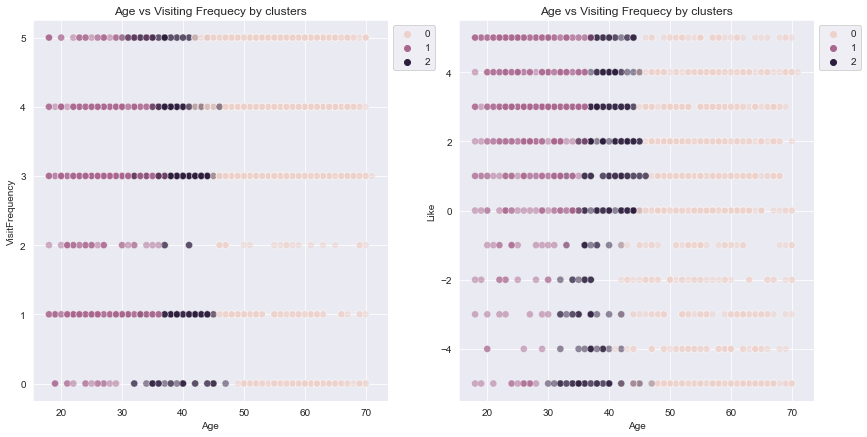

In [24]:
plt.figure(figsize = (14,7))
    
plt.subplot(121)
sns.scatterplot( x = 'Age', y = 'VisitFrequency' , data = df, s = 50, hue = y_predict_agg, alpha = 0.5)
plt.xlabel("Age")
plt.ylabel("VisitFrequency")
plt.title('Age vs Visiting Frequecy by clusters')
plt.legend(bbox_to_anchor = (1,1))

plt.subplot(122)
sns.scatterplot( x = 'Age', y = 'Like' , data = df, s = 50, hue = y_predict_agg, alpha = 0.5)
plt.xlabel("Age")
plt.ylabel("Like")
plt.title('Age vs Visiting Frequecy by clusters')
plt.legend(bbox_to_anchor = (1,1))
plt.show()

##### From above graph, again it is clear that the clusters formed are directly related to the age-category one belongs to. However, there is a large amount of over lapping between the clusters so it's not possible to know exactly from which point of age a cluster category begins and ends.